<a href="https://colab.research.google.com/github/BrittonWinterrose/DS-Sprint-02-Storytelling-With-Data/blob/master/module3-make-explanatory-visualizations/LS_DS_123_Make_explanatory_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Choose appropriate visualizations


Recreate this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)

### Recreate visualization

In [1]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#generate fake info first
fake = pd.Series([38,3,2,1,2,4,6,5,5,33], index = range(1,11))

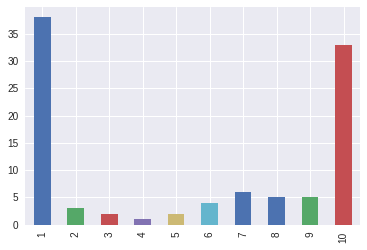

In [5]:
fake.plot.bar();

In [11]:
plt.style.available

['seaborn-pastel',
 'classic',
 'seaborn-ticks',
 'ggplot',
 'seaborn-poster',
 'seaborn-notebook',
 'Solarize_Light2',
 'seaborn-muted',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'fivethirtyeight',
 'seaborn-dark',
 'seaborn',
 'seaborn-deep',
 'bmh',
 'fast',
 '_classic_test',
 'seaborn-talk',
 'seaborn-paper',
 'seaborn-darkgrid',
 'grayscale',
 'dark_background']

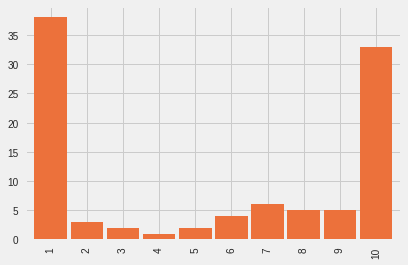

In [16]:
plt.style.use('fivethirtyeight')
fake.plot.bar(color = '#EC713B', width = .9);
# So now we've got the bars and their heights looking good. 

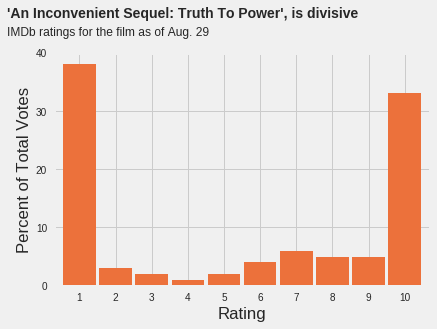

In [39]:
fake = pd.Series([38,3,2,1,2,4,6,5,5,33], index = range(1,11))
plt.style.use('fivethirtyeight')
ax = fake.plot.bar(color = '#EC713B', width = .9)
# how to rotate
ax.tick_params(labelrotation = 0)
# add a title
ax.set(xlabel='Rating',ylabel='Percent of Total Votes', yticks = range(0,50,10))
ax.text(x= -2, y =46, s="'An Inconvenient Sequel: Truth To Power', is divisive", weight = 'bold', fontsize = 14);
ax.text(x= -2, y =43, s="IMDb ratings for the film as of Aug. 29", fontsize = 12);

In [15]:
display(example)

### Get the Data

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [45]:
df.shape

(80053, 27)

In [46]:
df.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [0]:
df.timestamp = pd.to_datetime(df.timestamp)

In [48]:
df.timestamp.describe()

count                          80053
unique                         80053
top       2017-07-24 23:00:02.760781
freq                               1
first     2017-07-17 12:28:32.785639
last      2017-08-29 23:10:06.218251
Name: timestamp, dtype: object

In [0]:
df.set_index('timestamp', inplace=True)

In [54]:
df.category.value_counts()

Aged 45+              4216
Aged under 18         4216
Males under 18        4216
Females               4216
Aged 18-29            4216
Females Aged 18-29    4216
Non-US users          4216
US users              4216
Females Aged 30-44    4216
Males Aged 45+        4216
Males                 4216
Aged 30-44            4216
IMDb users            4216
IMDb staff            4216
Males Aged 18-29      4216
Top 1000 voters       4216
Females Aged 45+      4216
Males Aged 30-44      4216
Females under 18      4165
Name: category, dtype: int64

In [56]:
#filter by x, boolean indexing
df[df.category=='IMDb users']

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:36.697246,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,9,10,18,24,30,256,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8
2017-07-17 12:34:21.250099,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,9,10,18,24,30,256,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8
2017-07-17 13:00:06.506688,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,9,10,18,24,30,256,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8
2017-07-17 14:00:06.727742,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
2017-07-17 15:00:06.055125,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
2017-07-17 16:00:06.023053,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
2017-07-17 17:00:06.142993,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
2017-07-17 18:00:06.510891,680,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,306,14,8,5,9,10,18,24,30,256,45.0,2.1,1.2,0.7,1.3,1.5,2.6,3.5,4.4,37.6
2017-07-17 19:00:06.666467,680,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,306,14,8,5,9,10,18,24,30,256,45.0,2.1,1.2,0.7,1.3,1.5,2.6,3.5,4.4,37.6


In [0]:
lastday = df['2017-08-29']

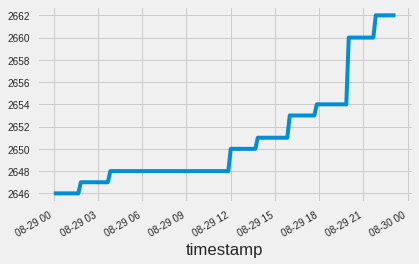

In [58]:
#this is a plot of the number of respondents for the last day of the data gathering. Monotonically increasing. 
#the votes represented in this dataset are cumulative. 

lastday[lastday.category=='IMDb users'].respondents.plot();

In [62]:
#now we're gettign the very last sample from the last table. 
columns = ['1_pct',	'2_pct',	'3_pct',	'4_pct',	'5_pct',	'6_pct',	'7_pct',	'8_pct',	'9_pct',	'10_pct']
final = df.tail(1)
data = final[columns].T
data.head()

timestamp,2017-08-29 23:10:06.218251
1_pct,38.4
2_pct,2.6
3_pct,1.4
4_pct,0.9
5_pct,2.1


### Now put the Data into our Recreated Plot

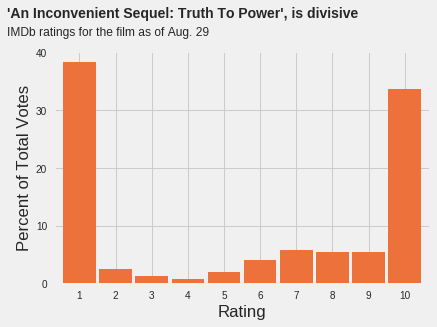

In [65]:
data.index = range(1,11)

plt.style.use('fivethirtyeight')
ax = data.plot.bar(color = '#EC713B', width = .9)
# how to rotate
ax.tick_params(labelrotation = 0)
# add a title
ax.set(xlabel='Rating',ylabel='Percent of Total Votes', yticks = range(0,50,10))
ax.text(x= -2, y =46, s="'An Inconvenient Sequel: Truth To Power', is divisive", weight = 'bold', fontsize = 14);
ax.text(x= -2, y =43, s="IMDb ratings for the film as of Aug. 29", fontsize = 12);
ax.get_legend().remove()

Using this data:

https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

### Stretch goals

Recreate more examples from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

For example:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) ([`altair`](https://altair-viz.github.io/gallery/index.html#maps))
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) ([`statsmodels`](https://www.statsmodels.org/stable/index.html))